In [1]:
#! /usr/bin/python3
import re
import os
import dendropy
from dendropy.calculate import treecompare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input the path to the gon_phyling folder you wish to analyze
replicate_dir = ""

# path to "TRUE" tree file
true_tree_file = ''

In [24]:
# generate robinson-foulds distances for phycorder-gon_phyling tree comparisons
maj_rule_weighted_rfs_dict = {}
maj_rule_unweighted_rfs_dict = {}

weighted_rfs_dict = {}
unweighted_rfs_dict = {}

replicate_count = 0
taxa_count = []
maj_rule_taxa_count = []

os.chdir(replicate_dir)

list_of_rep_dirs = []
dir_list = os.listdir(".")
for file in dir_list:
    if "combined_output-" in file:
        list_of_rep_dirs.append(file)
    else:
        continue

# looping through directories of runs
for dir_name in list_of_rep_dirs:
    os.chdir(dir_name)
    rep_files = os.listdir(".")
    phycord_best_trees = []
    gon_phy_best_trees = []
    phycord_maj_rule_trees = []
    gon_phy_maj_rule_trees = []
    
    replicate_count+=1
    
    maj_rule_weighted_rfs_dict[replicate_count] = {}
    maj_rule_unweighted_rfs_dict[replicate_count] = {}
    
    unweighted_rfs_dict[replicate_count] = {}
    weighted_rfs_dict[replicate_count] = {}
    
    weighted_rfs = []
    unweighted_rfs = []
    
    maj_rule_weighted_rfs = []
    maj_rule_unweighted_rfs = []
    
    for file in rep_files:
        if "RAxML_bestTree.phycorder-" in file:
            phycord_best_trees.append(file)
        elif "RAxML_bestTree.gon_phy-" in file:
            gon_phy_best_trees.append(file)
        elif "RAxML_bipartitions.phycorder_majority_rule-" in file:
            phycord_maj_rule_trees.append(file)
        elif "RAxML_bipartitions.gon_phy_majority_rule-" in file:
            gon_phy_maj_rule_trees.append(file)
        
        else:
            continue
    
    phycord_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    phycord_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    
    #print("\n")
    #print("**")
    #print("NEW REPLICATE NUMBERS")
    #print("**")
    #print("\n")
    
    # looping through output files in directory
    for phycord_count, phycord_tree in enumerate(phycord_best_trees):
        tree_file_open = open(phycord_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in taxa_count:
            taxa_count.append(step_count_taxa)
        for gon_phy_count, gon_phy_tree in enumerate(gon_phy_best_trees):
            if phycord_count == gon_phy_count:
                
                
                # establish common taxon namespace
                tns = dendropy.TaxonNamespace()
                
                # ensure all trees loaded use common namespace
                tree1 = dendropy.Tree.get(
                path = gon_phy_tree,
                schema='newick',
                taxon_namespace=tns)

                tree2 = dendropy.Tree.get(
                path = phycord_tree,
                schema = 'newick',
                taxon_namespace = tns)
    
                best_tree_unweighted = treecompare.symmetric_difference(tree1, tree2)
                #print(best_tree_unweighted)
                unweighted_rfs.append(best_tree_unweighted)
                
                best_tree_weighted = treecompare.weighted_robinson_foulds_distance(tree1, tree2)
                #print(best_tree_weighted)
                weighted_rfs.append(best_tree_weighted)
                
                
    for phycord_count, phycord_maj_rule_tree in enumerate(phycord_maj_rule_trees):
        tree_file_open = open(phycord_maj_rule_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in maj_rule_taxa_count:
            maj_rule_taxa_count.append(step_count_taxa)
        for gon_phy_count, gon_phy_maj_rule_tree in enumerate(gon_phy_maj_rule_trees):
            if phycord_count == gon_phy_count:
                
                
                # establish common taxon namespace
                tns = dendropy.TaxonNamespace()
                
                # ensure all trees loaded use common namespace
                tree1 = dendropy.Tree.get(
                path = gon_phy_maj_rule_tree,
                schema='newick',
                taxon_namespace=tns)

                tree2 = dendropy.Tree.get(
                path = phycord_maj_rule_tree,
                schema = 'newick',
                taxon_namespace = tns)
    
                maj_rule_unweighted = treecompare.symmetric_difference(tree1, tree2)
                #print(best_tree_unweighted)
                maj_rule_unweighted_rfs.append(maj_rule_unweighted)
                
                maj_rule_weighted = treecompare.weighted_robinson_foulds_distance(tree1, tree2)
                #print(best_tree_weighted)
                maj_rule_weighted_rfs.append(maj_rule_weighted)
    #print(unweighted_rfs)
    #print(weighted_rfs)
    #print(taxa_count)
    
    weight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(weighted_rfs):
            if num1 == num2:
                weight_temp_dict[count] = rf
    weighted_rfs_dict[replicate_count] = weight_temp_dict
    
    unweight_temp_dict = {}
    for num1, count in enumerate(taxa_count):
        for num2, rf in enumerate(unweighted_rfs):
            if num1 == num2:
                unweight_temp_dict[count] = rf
    unweighted_rfs_dict[replicate_count] = unweight_temp_dict
    
    mr_weight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(maj_rule_weighted_rfs):
            if num1 == num2:
                mr_weight_temp_dict[count] = rf
    maj_rule_weighted_rfs_dict[replicate_count] = mr_weight_temp_dict
    
    mr_unweight_temp_dict = {}
    for num1, count in enumerate(maj_rule_taxa_count):
        for num2, rf in enumerate(maj_rule_unweighted_rfs):
            if num1 == num2:
                mr_unweight_temp_dict[count] = rf
    maj_rule_unweighted_rfs_dict[replicate_count] = mr_unweight_temp_dict
                
    os.chdir(replicate_dir)
#print(unweighted_rfs_dict)
#print(weighted_rfs_dict)

unweighted_df = pd.DataFrame.from_dict(unweighted_rfs_dict ,orient='columns')
weighted_df = pd.DataFrame.from_dict(weighted_rfs_dict,orient='columns')
mr_unweighted_df = pd.DataFrame.from_dict(maj_rule_unweighted_rfs_dict ,orient='columns')
mr_weighted_df = pd.DataFrame.from_dict(maj_rule_weighted_rfs_dict,orient='columns')

mr_unweighted_df.head()

,1
20,4
30,14
40,12
50,38


In [12]:
# process comparison df's for plotting
unweighted_df['mean rf'] = unweighted_df.mean(axis=1)
unweighted_mean = unweighted_df['mean rf']
unweighted_df['std'] = unweighted_df.std(axis=1)
unweighted_df.head()

mr_unweighted_df['mean rf'] = mr_unweighted_df.mean(axis=1)
mr_unweighted_mean = mr_unweighted_df['mean rf']
mr_unweighted_df['std'] = mr_unweighted_df.std(axis=1)
mr_unweighted_df.head()

weighted_df['mean rf'] = weighted_df.mean(axis=1)
weighted_mean = weighted_df['mean rf']
weighted_df['std'] = weighted_df.std(axis=1)
weighted_df.head()

mr_weighted_df['mean rf'] = mr_weighted_df.mean(axis=1)
mr_weighted_mean = mr_weighted_df['mean rf']
mr_weighted_df['std'] = mr_weighted_df.std(axis=1)
mr_weighted_df.head()

unweighted_df['isolate number'] = unweighted_df.index
unweighted_df.head()

mr_unweighted_df['isolate number'] = mr_unweighted_df.index
mr_unweighted_df.head()

weighted_df['isolate number'] = weighted_df.index
weighted_df.head()

mr_weighted_df['isolate number'] = mr_weighted_df.index
mr_weighted_df.head()

,1,mean rf,std,isolate number
20,0.000051,0.000051,0.0,20
30,0.000060,0.000060,0.0,30
40,0.000168,0.000168,0.0,40
50,0.036764,0.036764,0.0,50


In [31]:
# Calculating absolute Error section between "True" tree and esimate trees

tree = open(true_tree_file,'r')
read_tree = tree.read()

# establishes how to count each taxon in a tree in order to calculate maxRF
name_id = "taxon"

# regex that searches for names based on how we expect taxa to be named in the tree
name_regex = name_id + "_\d+"

name_grabber = re.compile(name_regex)

# find all taxa names in tree
true_tree_taxa_names = re.findall(name_grabber, read_tree)

# count the number of taxa in the tree
taxa_counter = 0
for item in true_tree_taxa_names:
    taxa_counter+=1

# begin getting rf comparisons for all trees vs the TRUE tree
phycorder_maj_rule_weighted_rfs_dict = {}
phycorder_maj_rule_unweighted_rfs_dict = {}

gon_phyling_maj_rule_weighted_rfs_dict = {}
gon_phyling_maj_rule_unweighted_rfs_dict = {}

phycorder_weighted_rfs_dict = {}
phycorder_unweighted_rfs_dict = {}

gon_phyling_weighted_rfs_dict = {}
gon_phyling_unweighted_rfs_dict = {}

replicate_count = 0
taxa_count = []
maj_rule_taxa_count = []

os.chdir(replicate_dir)

list_of_rep_dirs = []
dir_list = os.listdir(".")
for file in dir_list:
    if "combined_output-" in file:
        list_of_rep_dirs.append(file)
    else:
        continue


# looping through directories of runs
for dir_name in list_of_rep_dirs:
    os.chdir(dir_name)
    rep_files = os.listdir(".")
    phycord_best_trees = []
    gon_phy_best_trees = []
    phycord_maj_rule_trees = []
    gon_phy_maj_rule_trees = []
    
    replicate_count+=1
    
    phycorder_maj_rule_weighted_rfs_dict[replicate_count] = {}
    phycorder_maj_rule_unweighted_rfs_dict[replicate_count] = {}
    
    gon_phyling_maj_rule_weighted_rfs_dict[replicate_count] = {}
    gon_phyling_maj_rule_unweighted_rfs_dict[replicate_count] = {}
    
    phycorder_unweighted_rfs_dict[replicate_count] = {}
    phycorder_weighted_rfs_dict[replicate_count] = {}
    
    gon_phyling_unweighted_rfs_dict[replicate_count] = {}
    gon_phyling_weighted_rfs_dict[replicate_count] = {}
    
    phycorder_weighted_rfs = []
    phycorder_unweighted_rfs = []
    
    gon_phyling_weighted_rfs = []
    gon_phyling_unweighted_rfs = []
    
    phycorder_maj_rule_weighted_rfs = []
    phycorder_maj_rule_unweighted_rfs = []
    
    gon_phyling_maj_rule_weighted_rfs = []
    gon_phyling_maj_rule_unweighted_rfs = []
    
    for file in rep_files:
        if "RAxML_bestTree.phycorder-" in file:
            phycord_best_trees.append(file)
        elif "RAxML_bestTree.gon_phy-" in file:
            gon_phy_best_trees.append(file)
        elif "RAxML_bipartitions.phycorder_majority_rule-" in file:
            phycord_maj_rule_trees.append(file)
        elif "RAxML_bipartitions.gon_phy_majority_rule-" in file:
            gon_phy_maj_rule_trees.append(file)
        
        else:
            continue
            
    
    phycord_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_best_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    phycord_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    gon_phy_maj_rule_trees.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
    
    #print("\n")
    #print("**")
    #print("NEW REPLICATE NUMBERS")
    #print("**")
    #print("\n")

    
    # looping through output files in directory
    for phycord_count, phycord_tree in enumerate(phycord_best_trees):
        
        tree_file_open = open(phycord_tree, 'r')
        read_tree = tree_file_open.read()
        step_count_taxa = read_tree.count("taxon")
        if step_count_taxa not in taxa_count:
            taxa_count.append(step_count_taxa)
        
        phycord_taxa_names = re.findall(name_grabber, read_tree)
        
        shared_names_list = []
        for name in true_tree_taxa_names:
            if name in phycord_taxa_names:
                shared_names_list.append(name)
        
        names_not_shared_list = []
        for name in true_tree_taxa_names:
            if name not in shared_names_list:
                names_not_shared_list.append(name)
        
        

        # establish common taxon namespace
        tns = dendropy.TaxonNamespace()
                
        # ensure all trees loaded use common namespace
        true_tree = dendropy.Tree.get(
        path = true_tree_file,
        schema='newick',
        taxon_namespace = tns)
        
        # remove tips from true tree that aren't present in current estimate tree
        true_tree.prune_taxa_with_labels(names_not_shared_list)
        
        tree2 = dendropy.Tree.get(
        path = phycord_tree,
        schema = 'newick',
        taxon_namespace = tns)
        
        
        best_tree_unweighted = treecompare.symmetric_difference(true_tree, tree2)
        #print(best_tree_unweighted)
        phycorder_unweighted_rfs.append(best_tree_unweighted)
        #print(best_tree_unweighted)
        
        best_tree_weighted = treecompare.weighted_robinson_foulds_distance(true_tree, tree2)
        #print(best_tree_weighted)
        phycorder_weighted_rfs.append(best_tree_weighted)
        #print(best_tree_weighted)
        
#print(phycorder_weighted_rfs_dict)
#print(phycorder_unweighted_rfs_dict)
        

original true tree
((((((taxon_97:0.000164564634331037,taxon_61:4.065451841106077e-05):7.372191775627773e-05,((taxon_95:2.18738358294318e-06,(taxon_29:3.44249635065988e-06,taxon_28:1.05266076782108e-06):1.28469372361424e-06):1.256058365596392e-05,(taxon_57:1.694999844591252e-05,taxon_62:4.88451975079254e-06):2.20096384434651e-06):8.331451444725347e-05):0.0012140998213930427,(((taxon_59:0.0001524957902081374,(taxon_24:0.00013004480661460178,taxon_103:7.620185916011044e-05):0.000257615586683382):0.0013553467403688484,((taxon_8:0.001132556965303959,(((taxon_163:0.0005354546764103048,(((taxon_58:0.0003043136609222203,(((taxon_63:0.0002029034838743442,(taxon_168:0.0001063126182987653,taxon_84:0.00015447858756205892):9.1822064183732e-06):1.644232282875758e-05,taxon_34:0.00022272040425799363):9.662207758729637e-05,(((taxon_72:0.0001377622212900024,taxon_190:5.884928943970187e-05):9.040939274471984e-05,taxon_92:0.00010546746334784836):0.00018305554296274096,taxon_93:0.00020306780744238276):4.2

AttributeError: 'NoneType' object has no attribute 'as_string'

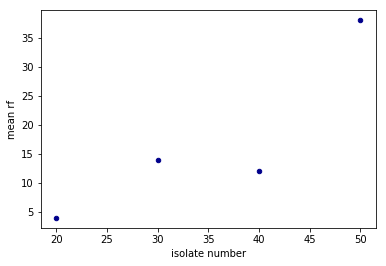

In [11]:
ax1 = unweighted_df.plot.scatter(x='isolate number',y='mean rf',c='DarkBlue')

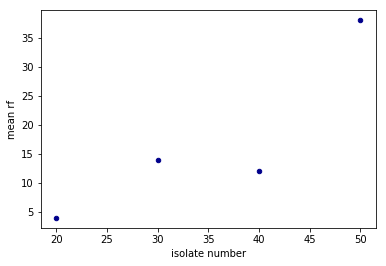

In [12]:
ax2 = mr_unweighted_df.plot.scatter(x='isolate number',y='mean rf',c='DarkBlue')

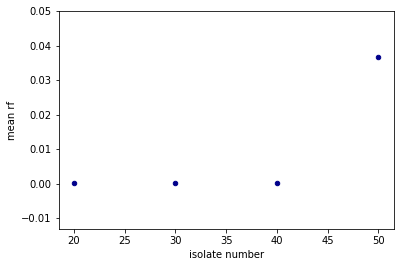

In [13]:
ax3 = weighted_df.plot.scatter(x='isolate number',y='mean rf',c='DarkBlue')

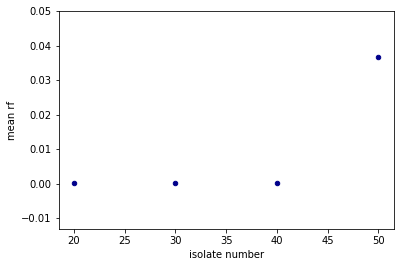

In [14]:
ax4 = mr_weighted_df.plot.scatter(x='isolate number',y='mean rf',c='DarkBlue')

In [21]:
ax1.figure.savefig(replicate_dir + "/"+ 'unweighted_rf.png')
ax2.figure.savefig(replicate_dir + "/"+ 'maj_rule_unweighted_rf.png')
ax3.figure.savefig(replicate_dir + "/"+ 'weighted_rf.png')
ax4.figure.savefig(replicate_dir + "/"+ 'maj_rule_weighted_rf.png')